## About the project

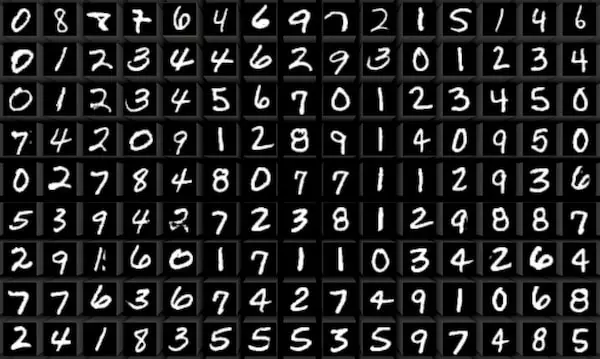

There are thousands of handwritten images with lebels in this data set.

After building the model with Neural Network, we will use custom test image to try and see if it can identify the digit or not.

## Workflow

Dataset => Image Procesing => Trest Train Split => Neural Network

New Image => Trained Neural Network => Hand written Digit Prediction

## Code

#### Base Code

In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
# Loading the MNIST data from the keras dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Train data have 60k grayscale image of 28 x 28 size

Test data have 10k grayscake image of 28 x 28 size

All the images have the same dimension. so we don't need to resize.

In [ ]:
# printing the 10th image of the data
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


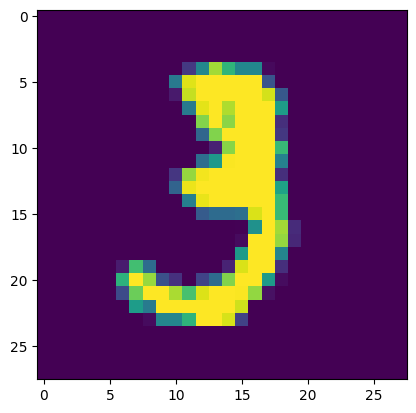

Image Lebel [ 3  ]


In [ ]:
plt.imshow(X_train[10])
plt.show()
# printing the image lebel
print("Image Lebel [", y_train[10]," ]")

In [ ]:
# all image lebels
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this lebels or use one-hot encoding

In [ ]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

Before all the values were between 0 to 255

now all the values are between 0 to 1

It is like the normalization or standardization in ML

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#### Building the Neural Network

In [ ]:
# Setting up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 28 rows and 28 cols
    keras.layers.Dense(50, activation='relu'), # 1st Hidden layer / Neurons = 50
    keras.layers.Dense(50, activation='relu'), # 2nd Hidden layer / Neurons = 50
    keras.layers.Dense(10, activation='sigmoid') # 10 output layer / class (0-9)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the Neural Network
model.compile(optimizer='adam', # determine the most optimal params
              loss='sparse_categorical_crossentropy', #
              metrics=['accuracy'])

In [ ]:
# Training the Neural Network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8470 - loss: 0.5184
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9580 - loss: 0.1441
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9690 - loss: 0.1021
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9770 - loss: 0.0790
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9806 - loss: 0.0631
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0523
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0436
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0387
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0326
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9911 - loss: 0.0300


loss function decreases and the accuracy increases

Final Traning data accuracy == 99.02% !!

In [ ]:
# Accuracy on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9677 - loss: 0.1295
0.9715999960899353


Test Data Accuracy == 97.14% !!

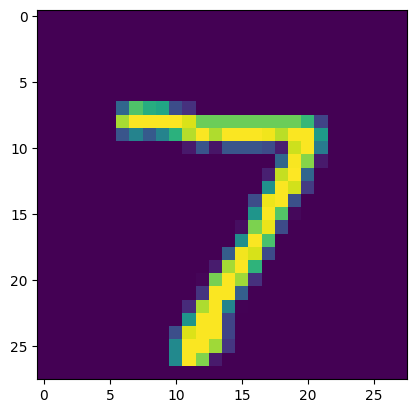

In [ ]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(Y_pred[0])

[9.0959406e-04 2.2981985e-04 1.5932335e-02 6.4835030e-01 8.9882258e-07
 3.8551723e-05 4.1855113e-12 9.9999833e-01 3.0671989e-03 8.6488640e-01]


This shows the probability of the test data point being 0-9

as you can see the index for number 7 is 9.99...

In [ ]:
# Converting the prediction probabilty to class lebel
lebel_of_first_image = [np.argmax(element) for element in Y_pred]
print(lebel_of_first_image[0])

7


In [ ]:
# converting the prediction to class lebels for all test points
Y_pred_lebels = [np.argmax(element) for element in Y_pred]
print(Y_pred_lebels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# Building a confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred_lebels)
print(conf_mat)

tf.Tensor(
[[ 963    0    2    1    3    2    3    3    1    2]
 [   0 1118    2    1    3    1    3    1    5    1]
 [   4    1 1002    7    5    0    1    8    3    1]
 [   1    0    3  982    1    6    1    8    4    4]
 [   1    0    3    0  962    0    5    3    2    6]
 [   2    1    0    7    1  870    7    0    2    2]
 [   1    2    1    1    4   14  934    0    1    0]
 [   0    2    4    1    2    1    1 1007    1    9]
 [   4    0    5   15    7   10    3    3  922    5]
 [   0    2    1    5   27    3    1   12    2  956]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

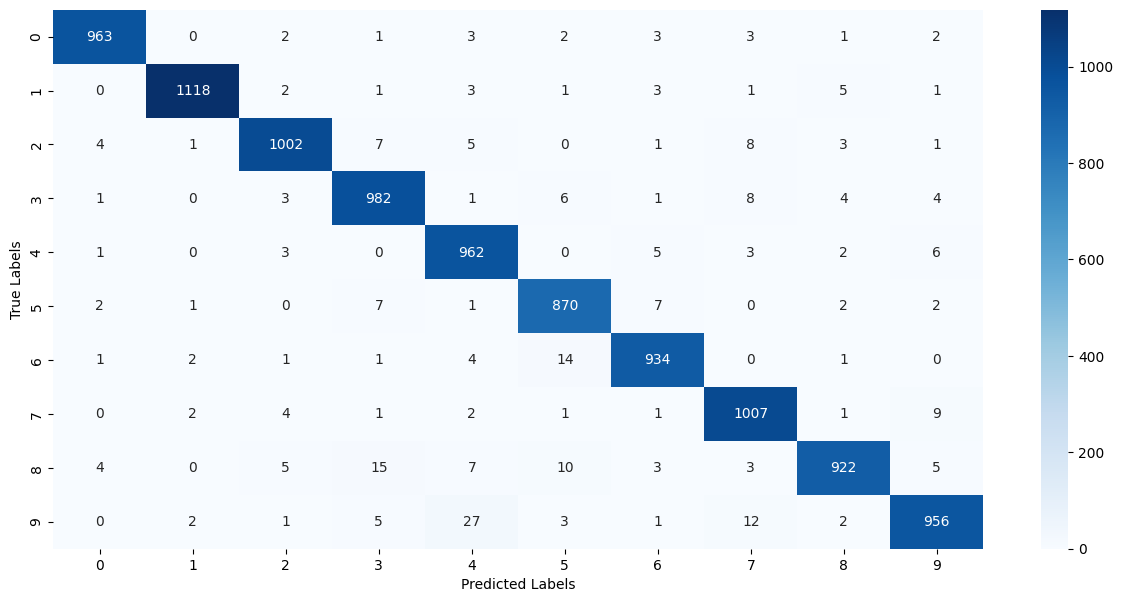

In [ ]:
# Building the heatmap
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Now, what does this heat map represents?

well we need to look at the true lebels and the predicted lebels.

For predicting 0 it was correct 963 times. Other times it predicted different digits like for example it predicted 0 as 2 for 2 cases, as 4 in 3 cases like that.

For the highest number of wrong prediction, while predicting 9 it predicted it as 4 for 27 cases as 4 and 9 looks kinda similar.

Thie kind of heat map helps us better understand the whole process and the dataset.

In more practical projects it have more uses

In [ ]:
# Building the predictive system

input_image = '/content/handwritten_9_for test.png'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image.shape)

(28, 27, 3)


as you can see the image i uploaded is black and white. but it is taking it as a RGb image as it have 3 channels. We need to change it into a grascale image.

Also the size is 28 x 27 not 28 x 28. So we will need to reshape it.

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [ ]:
input_img_resized = cv2.resize(grayscale, (28,28))

In [ ]:
input_img_resized.shape

(28, 28)

In [ ]:
# Scaling the image
input_img_resized = input_img_resized/255

In [ ]:
input_img_reshaped = np.reshape(input_img_resized, (1,28,28))

In [ ]:
input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.14773126 0.2836095  0.33276346 0.14805324 0.43694136 0.77025545
  0.59423864 0.1941153  0.58638567 0.44728386]]


In [ ]:
input_prediction_lebel = np.argmax(input_prediction)
print(input_prediction_lebel)

5


The image i gave was number 9 on it but the model predicted it as 5. well 9 and 5 are kinda similar looking but the model can make erros...

let's test another image-

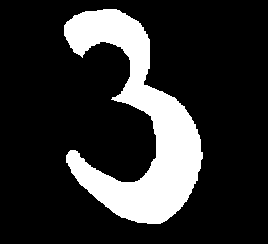

In [ ]:
# Building the predictive system

input_image = '/content/handwritten_3_for test.png'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)

In [ ]:
print(input_image.shape)

(244, 268, 3)


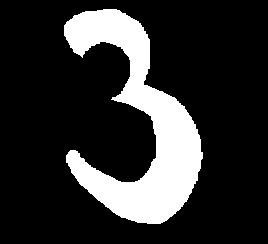

(28, 28)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

input_img_resized = cv2.resize(grayscale, (28,28))

input_img_resized.shape

In [ ]:
# Scaling the image
input_img_resized = input_img_resized/255
input_img_reshaped = np.reshape(input_img_resized, (1,28,28))

In [ ]:
input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.0790845e-07 2.7297859e-04 9.2277986e-01 9.8629135e-01 1.0068852e-10
  1.2743350e-02 5.6412042e-04 8.5732985e-08 9.5142223e-02 9.9144586e-09]]


In [ ]:
input_prediction_lebel = np.argmax(input_prediction)
print(input_prediction_lebel)

3


There you go. Correct prediction !!! ^__^

I just drew using the paint tool im windows. You can test by drawing something in your paint too. 🍀

Let's try another one.

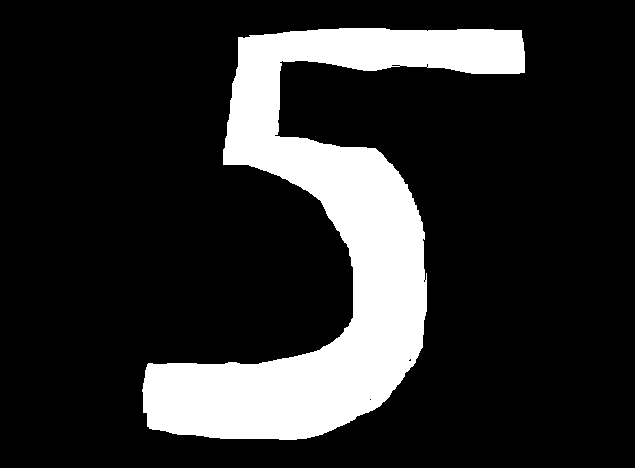

In [74]:
# Building the predictive system

input_image = '/content/handwritten_5_for test.png'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)

In [75]:
print(input_image.shape)

(468, 635, 3)


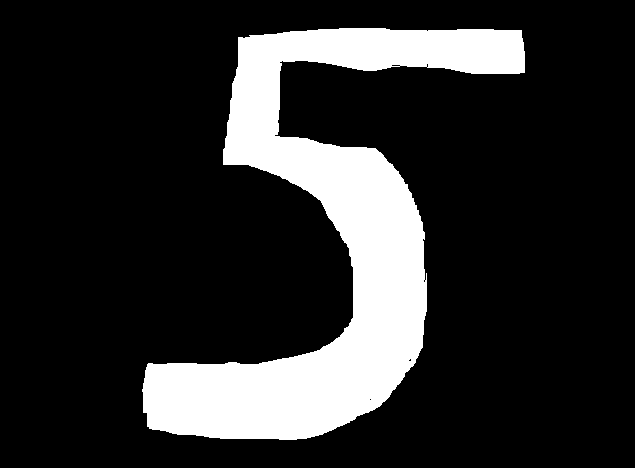

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.5297210e-11 1.1575622e-01 6.9440932e-05 9.9986076e-01 9.2343679e-09
  9.9999940e-01 7.0361665e-07 2.2023441e-03 7.3837821e-04 3.1350192e-01]]
5


In [76]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

input_img_resized = cv2.resize(grayscale, (28,28))

input_img_resized.shape

# Scaling the image
input_img_resized = input_img_resized/255
input_img_reshaped = np.reshape(input_img_resized, (1,28,28))

input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

input_prediction_lebel = np.argmax(input_prediction)
print(input_prediction_lebel)

Another one? Let's just have fun ok?

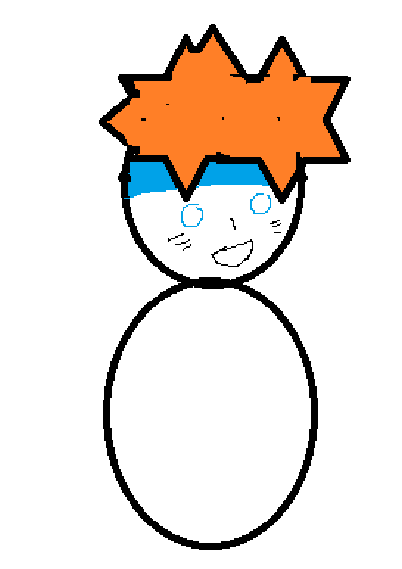

In [71]:
# Building the predictive system

input_image = '/content/handwritten_8_naruto_for test.png'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)

In [72]:
print(input_image.shape)

(569, 402, 3)


If you can't tell that's a naruto drawn in Paint using mouse lol

it is supposed to be a 8 btw

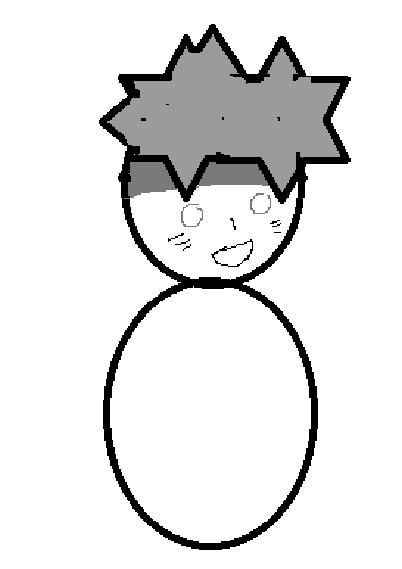

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[6.5921438e-01 3.2240901e-11 9.9983817e-01 9.9315059e-01 3.5846210e-38
  1.0000000e+00 2.9434763e-05 3.4572279e-15 3.6578444e-06 2.3074746e-25]]
5


In [73]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

input_img_resized = cv2.resize(grayscale, (28,28))

input_img_resized.shape

# Scaling the image
input_img_resized = input_img_resized/255
input_img_reshaped = np.reshape(input_img_resized, (1,28,28))

input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

input_prediction_lebel = np.argmax(input_prediction)
print(input_prediction_lebel)

You know what? This is fun. Let's draw another random image and see what happens :3

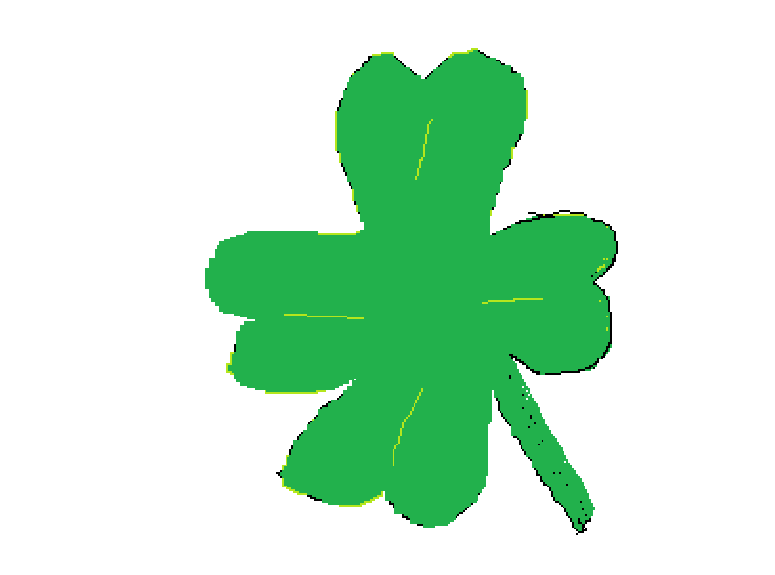

In [61]:
# Building the predictive system

input_image = '/content/clover_img_for_fun.png'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)

LOOK AT MY cRaZy DrAwInG sKiLl 🤡

Just draw my fev clover for fun amd some testing.

In [62]:
print(input_image.shape)

(575, 775, 3)


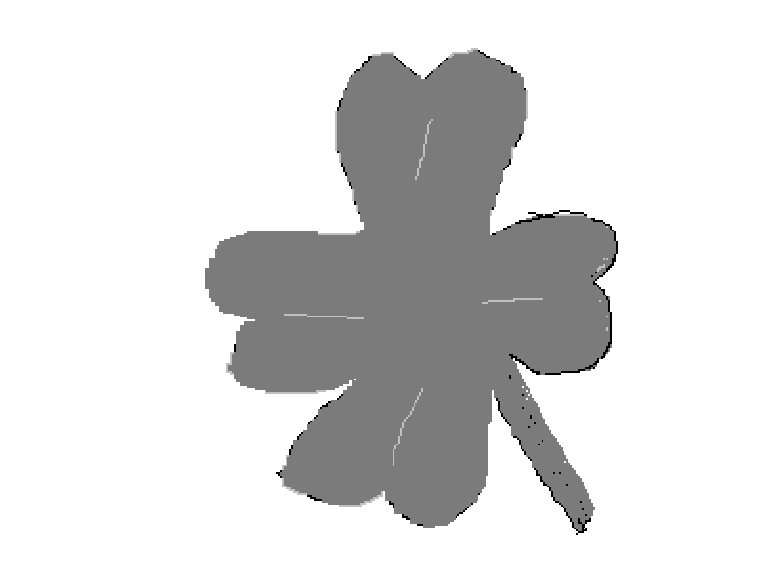

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[9.9998945e-01 1.0997558e-09 9.9989361e-01 4.0947463e-02 1.0941834e-36
  1.0000000e+00 5.0252720e-06 2.8983852e-11 3.0122807e-11 9.7569669e-21]]
5


In [63]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

input_img_resized = cv2.resize(grayscale, (28,28))

input_img_resized.shape

# Scaling the image
input_img_resized = input_img_resized/255
input_img_reshaped = np.reshape(input_img_resized, (1,28,28))

input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

input_prediction_lebel = np.argmax(input_prediction)
print(input_prediction_lebel)

Look all the prediction values are very low. Not even close.

But as 5 have the highest among the values it resulted in a 5.

Now i promise this is the last one lol.

Let's try a 2 digit number andsee what happens

I am off to my paint again :3

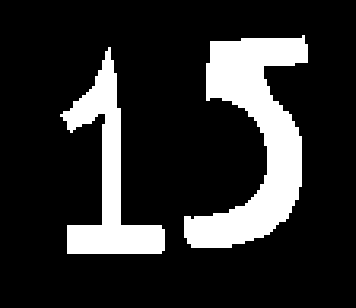

In [65]:
# Building the predictive system

input_image = '/content/handwritten_15_for test.png'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)

In [66]:
print(input_image.shape)

(308, 356, 3)


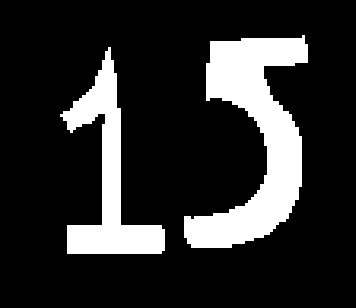

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[7.4884576e-01 5.1142941e-03 9.6175557e-01 5.4879383e-05 9.6254581e-01
  2.0993063e-02 6.3355849e-04 9.5637053e-01 1.6313606e-07 3.9303810e-05]]
4


In [67]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

input_img_resized = cv2.resize(grayscale, (28,28))

input_img_resized.shape

# Scaling the image
input_img_resized = input_img_resized/255
input_img_reshaped = np.reshape(input_img_resized, (1,28,28))

input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

input_prediction_lebel = np.argmax(input_prediction)
print(input_prediction_lebel)

Welp,

in conclusion we can say,

1. Black digit in white background do not work properly,
2. White digit with black background works perfectly,
3. Random image do not work (Me = Mr Obvious ),
4. Double digit do not work too.

Purpose of me trying different images is to See how far we can get with this basic digit identification.

Good luck with your project.

I'll be giving these tese masterpiece Images in the git hub too if you wanna try yourself lol. .👋